# Importing Libraries

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [196]:
data = pd.read_csv("https://raw.githubusercontent.com/AnweshaMondal/PredictBay/main/housing_price_dataset.csv")
df = pd.DataFrame(data)
print(df)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  
0                             4.09      230

# Splitting the Data and Label

In [199]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
          'Avg. Area Number of Bedrooms', 'Area Population']].values
y = data['Price'].values

In [201]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [203]:
def model(X, y):
    X_transpose = X.T
    beta = np.linalg.inv(X_transpose @ X) @ (X_transpose @ y)
    return beta

In [205]:
def predict(X, coefficients):
    return X @ coefficients

# Training the Model

In [208]:
coefficients = model(X, y)

In [210]:
y_pred = predict(X, coefficients)

### Calculating Mean Squared Error (MSE) and R-squared score

In [213]:
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [215]:
def calculate_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [217]:
mse = calculate_mse(y, y_pred)
r2 = calculate_r2(y, y_pred)

In [224]:
print("Coefficients:", coefficients)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Coefficients: [-2.63729903e+06  2.15780494e+01  1.65637027e+05  1.20659949e+05
  1.65113905e+03  1.52007439e+01]
Mean Squared Error (MSE): 10219734313.031612
R-squared (R^2): 0.9180238195119546


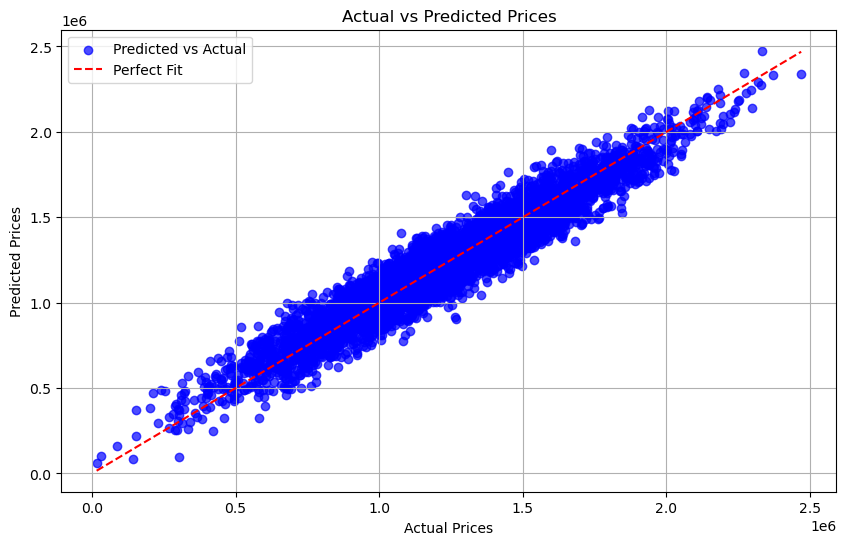

In [221]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='Perfect Fit', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy Score

In [238]:
r2 = calculate_r2(y, y_pred)
accuracy= r2*100
print(accuracy)

91.80238195119546


In [ ]:
M